`ApJdataFrames` Rayner et al. 2009
---
`Title`: THE INFRARED TELESCOPE FACILITY (IRTF) SPECTRAL LIBRARY: COOL STARS  
`Authors`: John T. Rayner, Michael C. Cushing, and William D. Vacca

Data is from this paper:  
http://iopscience.iop.org/article/10.1088/0067-0049/185/2/289/meta

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from astropy.io import ascii

In [3]:
import pandas as pd

## Table 7 - Strong metal lines in the Arcturus spectrum

In [4]:
#! curl http://iopscience.iop.org/0067-0049/185/2/289/suppdata/apjs311476t7_ascii.txt > ../data/Rayner2009/apjs311476t7_ascii.txt

In [5]:
#! head ../data/Rayner2009/apjs311476t7_ascii.txt

In [6]:
nn = ['wl1', 'id1', 'wl2', 'id2', 'wl3', 'id3', 'wl4', 'id4']

In [7]:
tbl7 = pd.read_csv("../data/Rayner2009/apjs311476t7_ascii.txt", index_col=False,
                   sep="\t", skiprows=[0,1,2,3], names= nn)

This is a verbose way to do this, but whatever, it works:

In [8]:
line_list_unsorted = pd.concat([tbl7[[nn[0], nn[1]]].rename(columns={"wl1":"wl", "id1":"id"}),
           tbl7[[nn[2], nn[3]]].rename(columns={"wl2":"wl", "id2":"id"}),
           tbl7[[nn[4], nn[5]]].rename(columns={"wl3":"wl", "id3":"id"}),
           tbl7[[nn[6], nn[7]]].rename(columns={"wl4":"wl", "id4":"id"})], ignore_index=True, axis=0)

In [9]:
line_list = line_list_unsorted.sort_values('wl').dropna().reset_index(drop=True)

Finally:

In [10]:
#line_list.tail()

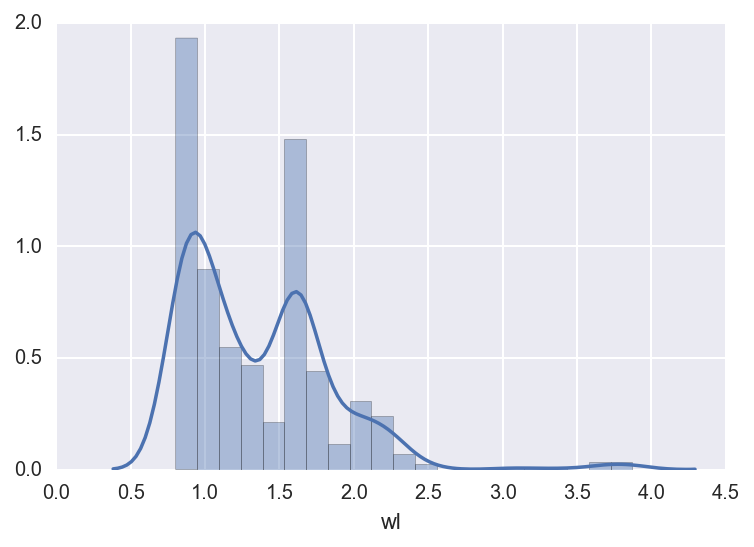

In [11]:
sns.distplot(line_list.wl)

The lines drop off towards $K-$band.

Save the file:

In [12]:
line_list.to_csv('../data/Rayner2009/tbl7_clean.csv', index=False)

## *The end*